<a href="https://colab.research.google.com/github/Akash-Mallick/Brain-Disease-Detection-Research/blob/main/VGG_16_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VGG-16 model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = np.load('/content/drive/MyDrive/Project_Phase/eeg-predictive_train.npz')
X = data['train_signals']
y = data['train_labels']

Visualizing the first 5 EEG samples as images...


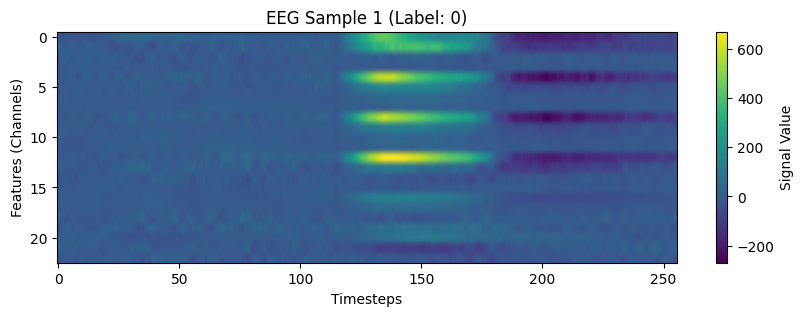

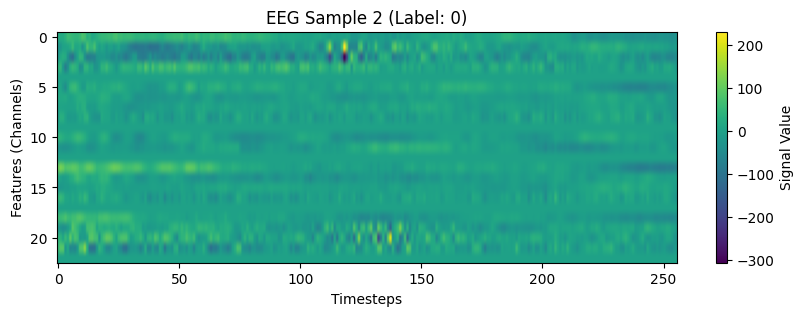

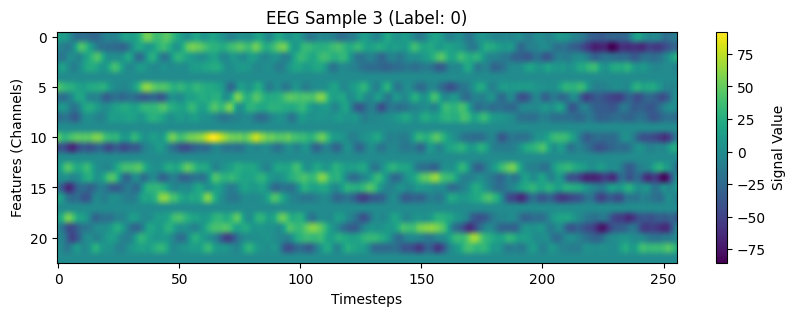

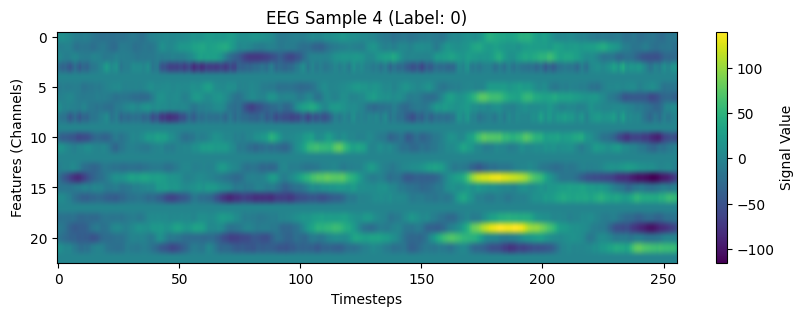

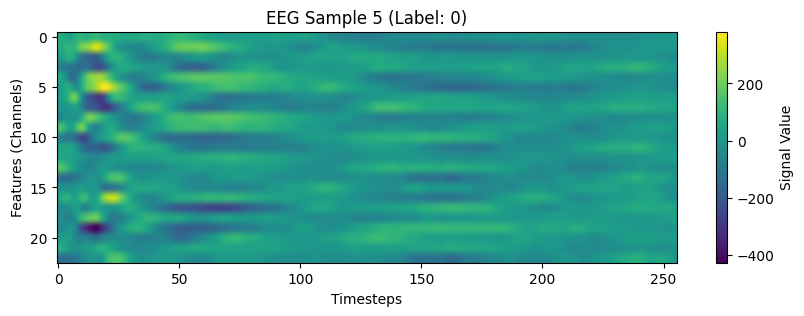

In [ ]:
# Subtask: Visualize EEG data as images

# Select a few samples to visualize (e.g., the first 5 samples)
num_samples_to_visualize = 5
samples_to_plot = X[:num_samples_to_visualize]
labels_to_plot = y[:num_samples_to_visualize]

print(f"Visualizing the first {num_samples_to_visualize} EEG samples as images...")

# Iterate through the selected samples and plot them
for i in range(num_samples_to_visualize):
    sample = samples_to_plot[i]
    label = labels_to_plot[i] # This will be the one-hot encoded label

    # Assuming the shape of a single sample is (features, timesteps) -> (23, 256)
    # We can treat this as a 2D image where features are rows and timesteps are columns.
    # The imshow function is suitable for visualizing 2D data.

    plt.figure(figsize=(10, 3)) # Adjust figure size as needed
    plt.imshow(sample, aspect='auto', cmap='viridis') # Use a colormap
    plt.colorbar(label='Signal Value')
    plt.title(f'EEG Sample {i+1} (Label: {np.argmax(label)})') # Display the class label
    plt.xlabel('Timesteps')
    plt.ylabel('Features (Channels)')
    plt.show()

In [ ]:
# After loading the data
print("Shape of X after loading:", X.shape)
print("Shape of y after loading:", y.shape)

    # After to_categorical
y = to_categorical(y)
print("Shape of y after to_categorical:", y.shape)

    # After train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X after loading: (8282, 23, 256)
Shape of y after loading: (8282,)
Shape of y after to_categorical: (8282, 2)
Shape of X_train: (6625, 23, 256)
Shape of y_train: (6625, 2)
Shape of X_test: (1657, 23, 256)
Shape of y_test: (1657, 2)


In [ ]:
y = to_categorical(y)

In [ ]:
# %%
data = np.load('/content/drive/MyDrive/Project_Phase/eeg-predictive_train.npz')
X = data['train_signals']
y = data['train_labels'] # y is already (8282, 2)

print("Original X shape:", X.shape)
print("Original y shape:", y.shape) # This should be (8282, 2)
# %%
# Remove or comment out this line:
# y = to_categorical(y)
# %%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# %%
# ... rest of your code for scaling, building the model, compiling, and fitting


Original X shape: (8282, 23, 256)
Original y shape: (8282,)


In [ ]:
# %%
data = np.load('/content/drive/MyDrive/Project_Phase/eeg-predictive_train.npz')
X = data['train_signals']
y = data['train_labels']

print("Original X shape:", X.shape)
print("Original y shape:", y.shape)
# %%
# Ensure y is 1D before to_categorical
if len(y.shape) > 1:
    # If y is already one-hot encoded (e.g., (8282, 2)), you might not need to_categorical
    # or you need to revert it to integer labels first if you want to re-encode.
    # Based on your previous outputs, it seems like y starts as (8282,)
    # If it's somehow not (8282,) here, investigate how it was loaded.
    print("Warning: y is not 1D before to_categorical. Its shape is:", y.shape)
    # Depending on the actual shape of y, you might need to adjust this part.
    # If y is (8282, 2) and is already one-hot encoded, skip to_categorical.
    # If y is (8282, 2, 2) from a previous error, you need to fix the data loading/preprocessing.

# Apply to_categorical ONCE after loading the data, if y is 1D
if len(y.shape) == 1:
    y = to_categorical(y)
    print("Shape of y after to_categorical:", y.shape)
else:
    print("Skipping to_categorical as y is not 1D.") # Or handle the unexpected shape

# %%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# %%
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape) # This should now be (samples, num_classes)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)   # This should now be (samples, num_classes)
# %%
# ... rest of your code for scaling, building the model, compiling, and fitting

Original X shape: (8282, 23, 256)
Original y shape: (8282,)
Shape of y after to_categorical: (8282, 2)
Shape of X_train: (6625, 23, 256)
Shape of y_train: (6625, 2)
Shape of X_test: (1657, 23, 256)
Shape of y_test: (1657, 2)


In [ ]:
# %% Imports already in cell
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Conv1DTranspose, LeakyReLU, Reshape, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample
import tensorflow as tf

# Assuming X, y, X_train, y_train, X_test, y_test are defined from previous cells.
# This consolidated cell will ensure all intermediate variables for GAN and data augmentation are set up.

# --- GAN Implementation - Part 1: Data Preparation (from cell 49df7eaf) ---
# Transpose X if it's not already in (samples, timesteps, features)
# Check the shape of X from previous outputs: (8282, 23, 256) -> (samples, features, timesteps)
# We need (samples, timesteps, features) -> (8282, 256, 23)
if X.shape[1] == 23 and X.shape[2] == 256:
    X_for_gan = np.transpose(X, (0, 2, 1))
    print(f"Transposed X shape for GAN: {X_for_gan.shape}")
else:
    X_for_gan = X
    print(f"X shape for GAN (no transpose needed): {X_for_gan.shape}")

input_timesteps = X_for_gan.shape[1] # 256
input_channels = X_for_gan.shape[2] # 23
latent_dim = 100 # Dimension of the latent space (input to the generator)

# Rescale real data to be within the range of the generator's tanh output (-1 to 1)
data_min = np.min(X_for_gan)
data_max = np.max(X_for_gan)
scaled_X_for_gan = 2 * ((X_for_gan - data_min) / (data_max - data_min)) - 1
print(f"Scaled X shape for GAN training: {scaled_X_for_gan.shape}")


# --- GAN Implementation - Part 2: Generator Model (from cell dec9dd89) ---
def build_generator(latent_dim, output_timesteps, output_channels):
    gan_input = Input(shape=(latent_dim,))
    initial_timesteps = output_timesteps // (2**4) # 256 // 16 = 16
    initial_features = 128
    x = Dense(initial_timesteps * initial_features, use_bias=False)(gan_input)
    x = Reshape((initial_timesteps, initial_features))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Conv1DTranspose(filters=64, kernel_size=4, strides=2, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Conv1DTranspose(filters=32, kernel_size=4, strides=2, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Conv1DTranspose(filters=16, kernel_size=4, strides=2, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    generated_output = Conv1DTranspose(filters=output_channels, kernel_size=4, strides=2, padding='same', activation='tanh')(x)
    model = Model(inputs=gan_input, outputs=generated_output)
    return model

generator = build_generator(latent_dim, input_timesteps, input_channels)
print("\nGenerator Summary:")
generator.summary()


# --- GAN Implementation - Part 3: Discriminator Model (from cell 687fc9cb) ---
def build_discriminator(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=4, strides=2, padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=128, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=256, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])
    return model

discriminator = build_discriminator((input_timesteps, input_channels))
print("\nDiscriminator Summary:")
discriminator.summary()


# --- GAN Implementation - Part 4: Combined GAN Model (from cell bc996c36) ---
discriminator.trainable = False
gan_input = Input(shape=(latent_dim,))
generated_data_for_gan = generator(gan_input)
gan_output = discriminator(generated_data_for_gan)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
print("Combined GAN Model Summary:")
gan.summary()


# --- GAN Implementation - Part 5: Training the GAN (from cell c7abe36a) ---
gan_epochs = 100
batch_size_gan = 64
sample_interval = 100

valid = np.ones((batch_size_gan, 1))
fake = np.zeros((batch_size_gan, 1))
history_gan = {'d_loss': [], 'g_loss': [], 'd_accuracy': []}

print(f"Starting GAN training for {gan_epochs} epochs...")
for epoch in range(gan_epochs):
    idx = np.random.randint(0, scaled_X_for_gan.shape[0], batch_size_gan)
    real_data_batch = scaled_X_for_gan[idx]
    noise = tf.random.normal(shape=(batch_size_gan, latent_dim))
    fake_data_batch = generator.predict(noise, verbose=0)
    d_loss_real = discriminator.train_on_batch(real_data_batch, valid)
    d_loss_fake = discriminator.train_on_batch(fake_data_batch, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    noise = tf.random.normal(shape=(batch_size_gan, latent_dim))
    g_loss = gan.train_on_batch(noise, valid)
    history_gan['d_loss'].append(d_loss[0])
    history_gan['d_accuracy'].append(d_loss[1])
    history_gan['g_loss'].append(g_loss)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{gan_epochs} | D Loss: {d_loss[0]:.4f}, D Accuracy: {d_loss[1]:.4f} | G Loss: {g_loss:.4f}")
print("\nGAN training finished.")


# --- GAN Implementation - Part 6: Generate Synthetic Data (from cell 2b7c36f3) ---
num_synthetic_samples = 5000
print(f"Generating {num_synthetic_samples} synthetic samples...")
noise_for_generation = tf.random.normal(shape=(num_synthetic_samples, latent_dim))
synthetic_data = generator.predict(noise_for_generation, verbose=1)
print("Shape of generated synthetic data:", synthetic_data.shape)

print("Assigning labels by randomly sampling from y_train...")
indices = np.random.choice(len(y_train), num_synthetic_samples, replace=True)
synthetic_labels = y_train[indices]
print("Shape of generated synthetic labels:", synthetic_labels.shape)


# --- GAN Implementation - Part 7: Combine Real and Synthetic Data (from cell c38adf32) ---
print("Combining real and synthetic data...")
if X_train.shape[1] == 23 and X_train.shape[2] == 256:
    X_train_transposed = np.transpose(X_train, (0, 2, 1))
    print(f"Transposed X_train shape: {X_train_transposed.shape}")
else:
    X_train_transposed = X_train
    print(f"X_train shape (no transpose needed): {X_train_transposed.shape}")
combined_X_train = np.concatenate((X_train_transposed, synthetic_data), axis=0)
combined_y_train = np.concatenate((y_train, synthetic_labels), axis=0)
print("Shape of combined training data (real + synthetic X):", combined_X_train.shape)
print("Shape of combined training labels (real + synthetic y):", combined_y_train.shape)


# --- Addressing Class Imbalance: Oversampling (from cell c2731eaf) ---
print("Applying oversampling to the combined training data...")
y_train_classes = np.argmax(combined_y_train, axis=1)
majority_class_index = 0
minority_class_index = 1
majority_indices = np.where(y_train_classes == majority_class_index)[0]
minority_indices = np.where(y_train_classes == minority_class_index)[0]
majority_class_X = combined_X_train[majority_indices]
majority_class_y = combined_y_train[majority_indices]
minority_class_X = combined_X_train[minority_indices]
minority_class_y = combined_y_train[minority_indices]
print(f"Original majority class samples: {len(majority_indices)}")
print(f"Original minority class samples: {len(minority_indices)}")
minority_class_X_oversampled, minority_class_y_oversampled = resample(minority_class_X, minority_class_y,
                                                                      replace=True,
                                                                      n_samples=len(majority_indices),
                                                                      random_state=42)
print(f"Oversampled minority class samples: {len(minority_class_X_oversampled)}")
X_train_resampled = np.concatenate((majority_class_X, minority_class_X_oversampled), axis=0)
y_train_resampled = np.concatenate((majority_class_y, minority_class_y_oversampled), axis=0)
print("Shape of resampled training data (X_train_resampled):", X_train_resampled.shape)
print("Shape of resampled training labels (y_train_resampled):", y_train_resampled.shape)
shuffle_indices = np.random.permutation(len(X_train_resampled))
X_train_resampled = X_train_resampled[shuffle_indices]
y_train_resampled = y_train_resampled[shuffle_indices]
print("Resampled training data has been shuffled.")


# --- Original content of uKpKykg_RihN (VGG model training) ---
# The VGG-like model expects input shape (samples, features, timesteps)
# Our resampled training data might be currently in (samples, timesteps, features) based on
# the GAN output shape and how combined_X_train was handled.
# We need to transpose X_train_resampled back to (samples, features, timesteps) for the VGG model.
if X_train_resampled.shape[1] == 256 and X_train_resampled.shape[2] == 23:
    X_train_vgg = np.transpose(X_train_resampled, (0, 2, 1))
    print(f"Transposed X_train_resampled shape for VGG: {X_train_vgg.shape}")
else:
    # If X_train_resampled is already in the desired shape, use it directly
    X_train_vgg = X_train_resampled
    print(f"X_train_resampled shape for VGG (no transpose needed): {X_train_vgg.shape}")

# X_test and y_test should still be in their original format (samples, features, timesteps) and one-hot encoded
# Let's verify their shapes
if 'X_test' in globals() and 'y_test' in globals():
     print(f"X_test shape: {X_test.shape}")
     print(f"y_test shape: {y_test.shape}")
else:
     print("Warning: X_test and y_test not found. Evaluation will not be possible.")
     X_test = None
     y_test = None

# Build the VGG-like model
# We need to redefine the model to train it on the resampled data.
# Using a new model instance to train from scratch on the resampled data.
model_vgg_resampled = Sequential()

# Add convolutional and pooling layers
# Ensure the input_shape matches the transposed resampled data
model_vgg_resampled.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_vgg.shape[1], X_train_vgg.shape[2])))
model_vgg_resampled.add(MaxPooling1D(pool_size=2))
model_vgg_resampled.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_vgg_resampled.add(MaxPooling1D(pool_size=2))
model_vgg_resampled.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model_vgg_resampled.add(MaxPooling1D(pool_size=2))

# Flatten the output of the convolutional layers
model_vgg_resampled.add(Flatten())

# Add dense layers
model_vgg_resampled.add(Dense(128, activation='relu'))
model_vgg_resampled.add(Dropout(0.5))
model_vgg_resampled.add(Dense(64, activation='relu'))
model_vgg_resampled.add(Dropout(0.3))

# Add the output layer
model_vgg_resampled.add(Dense(y_train_resampled.shape[1], activation='softmax')) # Use resampled labels shape

# Compile the model
model_vgg_resampled.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
print("VGG-like Model Summary (trained on resampled data):")
model_vgg_resampled.summary()

# We already performed oversampling, so class weights might not be strictly necessary now
# but you could still use them if you want to experiment with fine-tuning the balance.
# Let's train without explicit class weights first, as oversampling is a direct way
# to balance the sample counts.

# Train the model on the resampled data
# You can adjust the number of epochs and batch_size
print("\nTraining VGG-like model on resampled data...")
history_vgg_resampled = model_vgg_resampled.fit(X_train_vgg, y_train_resampled,
                                                epochs=60, # Use the same number of epochs as initial training
                                                batch_size=64,
                                                validation_data=(X_test, y_test) if X_test is not None else None) # Validate on original test data


# Evaluate the model if test data is available
if X_test is not None and y_test is not None:
    loss_vgg_resampled, accuracy_vgg_resampled = model_vgg_resampled.evaluate(X_test, y_test)
    print('Test accuracy with VGG-like model trained on resampled data:', accuracy_vgg_resampled)
else:
    print("Skipping evaluation as test data is not available.")


# %% [markdown]
# ## Fine-tuning the VGG-like model (trained on resampled data)

# %%
# Fine-tuning the model trained on resampled data
# We can apply fine-tuning if needed after initial training on resampled data.

# Freeze all layers initially
for layer in model_vgg_resampled.layers:
    layer.trainable = False

# Unfreeze the last convolutional block and dense layers
# Adjust the layer indices based on your model architecture
# In this case, layers are: Conv1D, MaxPooling1D, Conv1D, MaxPooling1D, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Dense, Dropout, Dense
# The last Conv1D layer is at index 4, and the following layers are Dense and Dropout.
unfreeze_from_layer = 4 # Index of the last Conv1D layer

for layer in model_vgg_resampled.layers[unfreeze_from_layer:]:
    layer.trainable = True

# Compile the model again with a lower learning rate for fine-tuning
model_vgg_resampled.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.0001), # Lower learning rate for fine-tuning
                  metrics=['accuracy'])

# Print the model summary to see which layers are trainable
print("\nFine-tuning VGG-like Model Summary (trained on resampled data):")
model_vgg_resampled.summary()

# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)

# Fine-tune the model on the resampled training data
print("\nFine-tuning VGG-like model on resampled data...")
history_vgg_resampled_finetune = model_vgg_resampled.fit(X_train_vgg, y_train_resampled,
                                                         epochs=30, # Use the same number of epochs as initial fine-tuning
                                                         batch_size=64,
                                                         validation_data=(X_test, y_test) if X_test is not None else None, # Validate on original test data
                                                         callbacks=[early_stopping, reduce_lr]) # Added callbacks

# Evaluate the fine-tuned model if test data is available
if X_test is not None and y_test is not None:
    loss_vgg_resampled_finetune, accuracy_vgg_resampled_finetune = model_vgg_resampled.evaluate(X_test, y_test)
    print('Test accuracy with fine-tuned VGG-like model trained on resampled data:', accuracy_vgg_resampled_finetune)
else:
    print("Skipping evaluation as test data is not available.")


# %%
# You can then use this model to make predictions on the test data
# Assuming you have loaded and preprocessed your submission test data as X_test_submission
# predictions_vgg_resampled = model_vgg_resampled.predict(X_test_submission)
# predicted_labels_vgg_resampled = np.argmax(predictions_vgg_resampled, axis=1)
#
# # Example of creating a submission file (adapt to your specific requirements)
# import pandas as pd
# results_df_vgg_resampled = pd.DataFrame({'Id': range(len(predicted_labels_vgg_resampled)), 'Outcome': predicted_labels_vgg_resampled})
# results_df_vgg_resampled.to_csv('submission_vgg_resampled.csv', index=False)


Transposed X shape for GAN: (8282, 256, 23)
Scaled X shape for GAN training: (8282, 256, 23)

Generator Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │       204,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose                │ (None, 32, 64)         │        32,768 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_1              │ (None, 64, 32)         │         8,192 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 64, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_2              │ (None, 128, 16)        │         2,048 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 16)        │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_3              │ (None, 256, 23)        │         1,495 │
│ (Conv1DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,263 (977.59 KB)

 Trainable params: 249,783 (975.71 KB)

 Non-trainable params: 480 (1.88 KB)


Discriminator Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 128, 32)        │         2,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 64, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 32, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 16, 256)        │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,553 (701.38 KB)

 Trainable params: 179,553 (701.38 KB)

 Non-trainable params: 0 (0.00 B)

Combined GAN Model Summary:


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional (Functional)         │ (None, 256, 23)        │       250,263 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 1)              │       179,553 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,816 (1.64 MB)

 Trainable params: 249,783 (975.71 KB)

 Non-trainable params: 180,033 (703.25 KB)

Starting GAN training for 100 epochs...


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 10/100 | D Loss: 0.6951, D Accuracy: 0.4182 | G Loss: 0.7159
Epoch 20/100 | D Loss: 0.6957, D Accuracy: 0.3752 | G Loss: 0.7033
Epoch 30/100 | D Loss: 0.6964, D Accuracy: 0.3250 | G Loss: 0.6918
Epoch 40/100 | D Loss: 0.6972, D Accuracy: 0.2862 | G Loss: 0.6817
Epoch 50/100 | D Loss: 0.6983, D Accuracy: 0.2549 | G Loss: 0.6719
Epoch 60/100 | D Loss: 0.6995, D Accuracy: 0.2316 | G Loss: 0.6613
Epoch 70/100 | D Loss: 0.7008, D Accuracy: 0.2129 | G Loss: 0.6515
Epoch 80/100 | D Loss: 0.7024, D Accuracy: 0.2006 | G Loss: 0.6420
Epoch 90/100 | D Loss: 0.7043, D Accuracy: 0.1893 | G Loss: 0.6336
Epoch 100/100 | D Loss: 0.7065, D Accuracy: 0.1803 | G Loss: 0.6253

GAN training finished.
Generating 5000 synthetic samples...
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Shape of generated synthetic data: (5000, 256, 23)
Assigning labels by randomly sampling from y_train...
Shape of generated synthetic labels: (5000, 2)
Combining real and synthetic data...
Transposed X_train shape: (6625, 256, 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 21, 32)         │        24,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 8, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 2, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,418 (314.13 KB)

 Trainable params: 80,418 (314.13 KB)

 Non-trainable params: 0 (0.00 B)


Training VGG-like model on resampled data...
Epoch 1/60
285/285 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5005 - loss: 2.3436 - val_accuracy: 0.4931 - val_loss: 0.6884
Epoch 2/60
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5031 - loss: 0.7352 - val_accuracy: 0.2915 - val_loss: 0.7252
Epoch 3/60
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5087 - loss: 0.6993 - val_accuracy: 0.2589 - val_loss: 0.7214
Epoch 4/60
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5056 - loss: 0.6915 - val_accuracy: 0.7272 - val_loss: 0.6835
Epoch 5/60
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5052 - loss: 0.6903 - val_accuracy: 0.7188 - val_loss: 0.6925
Epoch 6/60
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5079 - loss: 0.6884 - val_accuracy: 0.7218 - val_loss: 0.6606
Epoch 7/60
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4990 - loss: 0.6926 - val_accuracy: 0.7544 - val_loss: 0.6904
Epoch 8/60
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 21, 32)         │        24,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 8, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 2, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,418 (314.13 KB)

 Trainable params: 49,602 (193.76 KB)

 Non-trainable params: 30,816 (120.38 KB)


Fine-tuning VGG-like model on resampled data...
Epoch 1/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5031 - loss: 0.6928 - val_accuracy: 0.2179 - val_loss: 0.6966 - learning_rate: 1.0000e-04
Epoch 2/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5012 - loss: 0.6929 - val_accuracy: 0.2179 - val_loss: 0.6960 - learning_rate: 1.0000e-04
Epoch 3/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4968 - loss: 0.6931 - val_accuracy: 0.2179 - val_loss: 0.6954 - learning_rate: 1.0000e-04
Epoch 4/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5026 - loss: 0.6930 - val_accuracy: 0.2179 - val_loss: 0.6947 - learning_rate: 1.0000e-04
Epoch 5/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4975 - loss: 0.6931 - val_accuracy: 0.2179 - val_loss: 0.6944 - learning_rate: 1.0000e-04
Epoch 6/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4985 - loss: 0.6930 - val_accuracy: 0.2179 - val_loss: 0.6943 - learning_rate: 1.0000e-04
Epoch 7/30
285

## GAN Implementation - Part 1: Data Preparation

In [ ]:
import tensorflow as tf
import numpy as np

# Assuming your data is already loaded and preprocessed, and you have X and y.
# Based on your previous code, X has shape (samples, 23, 256).
# For training a GAN to generate this data, we might want to treat each sample
# as a 1D sequence of length 256 with 23 features (channels).
# Let's transpose X to have shape (samples, 256, 23) for Conv1D layers.
# If your Conv1D layers are designed to work with (samples, features, timesteps),
# then you might not need to transpose. Let's stick to (samples, timesteps, features)
# which is more common for Conv1D in time series.

# Transpose X if it's not already in (samples, timesteps, features)
# Check the shape of X from previous outputs: (8282, 23, 256) -> (samples, features, timesteps)
# We need (samples, timesteps, features) -> (8282, 256, 23)
if X.shape[1] == 23 and X.shape[2] == 256:
    X_for_gan = np.transpose(X, (0, 2, 1))
    print(f"Transposed X shape for GAN: {X_for_gan.shape}")
else:
    X_for_gan = X
    print(f"X shape for GAN (no transpose needed): {X_for_gan.shape}")


input_timesteps = X_for_gan.shape[1] # 256
input_channels = X_for_gan.shape[2] # 23
latent_dim = 100 # Dimension of the latent space (input to the generator)

# Rescale real data to be within the range of the generator's tanh output (-1 to 1)
# Assuming your EEG data is not already in this range.
# You might need a more sophisticated scaling based on your data distribution.
# A simple min-max scaling to [-1, 1] is a common starting point for GANs with tanh output.
# Find the min and max values across all your training data
data_min = np.min(X_for_gan)
data_max = np.max(X_for_gan)

# Scale the data to [-1, 1]
scaled_X_for_gan = 2 * ((X_for_gan - data_min) / (data_max - data_min)) - 1

print(f"Scaled X shape for GAN training: {scaled_X_for_gan.shape}")

Transposed X shape for GAN: (8282, 256, 23)
Scaled X shape for GAN training: (8282, 256, 23)


## GAN Implementation - Part 2: Generator Model

In [ ]:
from tensorflow.keras.layers import Dense, Reshape, Flatten, Input, LeakyReLU, Dropout, Conv1D, Conv1DTranspose
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf # Ensure tf is imported here if running this cell independently

# Generator Model
def build_generator(latent_dim, output_timesteps, output_channels):
    # Use Input layer for clearer shape definition
    gan_input = Input(shape=(latent_dim,))

    # Calculate initial dimensions based on the desired output shape and number of Conv1DTranspose layers
    # With 4 Conv1DTranspose layers and stride 2, the total upsampling factor is 2^4 = 16.
    # So, initial_timesteps * 16 should be equal to output_timesteps (256).
    initial_timesteps = output_timesteps // (2**4) # 256 // 16 = 16
    initial_features = 128 # Example: Can be adjusted

    x = Dense(initial_timesteps * initial_features, use_bias=False)(gan_input)
    x = Reshape((initial_timesteps, initial_features))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = LeakyReLU()(x)
    print(f"Generator after initial layers shape: {x.shape}")


    # Use Conv1DTranspose (or UpSampling1D + Conv1D) for upsampling
    # Layer 1: Upsample
    x = Conv1DTranspose(filters=64, kernel_size=4, strides=2, padding='same', use_bias=False)(x) # 16 -> 32
    x = tf.keras.layers.BatchNormalization()(x)
    x = LeakyReLU()(x)
    print(f"Generator after Conv1DTranspose 1 shape: {x.shape}")


    # Layer 2: Upsample
    x = Conv1DTranspose(filters=32, kernel_size=4, strides=2, padding='same', use_bias=False)(x) # 32 -> 64
    x = tf.keras.layers.BatchNormalization()(x)
    x = LeakyReLU()(x)
    print(f"Generator after Conv1DTranspose 2 shape: {x.shape}")


    # Layer 3: Upsample
    x = Conv1DTranspose(filters=16, kernel_size=4, strides=2, padding='same', use_bias=False)(x) # 64 -> 128
    x = tf.keras.layers.BatchNormalization()(x)
    x = LeakyReLU()(x)
    print(f"Generator after Conv1DTranspose 3 shape: {x.shape}")


    # Layer 4: Upsample to target timesteps and features
    # The number of filters in the last layer should match the number of output channels (features)
    generated_output = Conv1DTranspose(filters=output_channels, kernel_size=4, strides=2, padding='same', activation='tanh')(x) # 128 -> 256, output_channels=23
    print(f"Generator after Conv1DTranspose 4 (final) shape: {generated_output.shape}")

    model = Model(inputs=gan_input, outputs=generated_output)
    return model

# Build the Generator (requires latent_dim, input_timesteps, input_channels from Part 1)
# Ensure latent_dim, input_timesteps, input_channels are defined before running this cell
# For demonstration, assuming they are defined in the previous cell:
if 'latent_dim' in globals() and 'input_timesteps' in globals() and 'input_channels' in globals():
    generator = build_generator(latent_dim, input_timesteps, input_channels)
    print("\nGenerator Summary:")
    generator.summary()
else:
    print("Please run the Data Preparation cell first to define necessary variables.")

Generator after initial layers shape: (None, 16, 128)
Generator after Conv1DTranspose 1 shape: (None, 32, 64)
Generator after Conv1DTranspose 2 shape: (None, 64, 32)
Generator after Conv1DTranspose 3 shape: (None, 128, 16)
Generator after Conv1DTranspose 4 (final) shape: (None, 256, 23)

Generator Summary:


Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2048)           │       204,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_4              │ (None, 32, 64)         │        32,768 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_5              │ (None, 64, 32)         │         8,192 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 64, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_6              │ (None, 128, 16)        │         2,048 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128, 16)        │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 128, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_7              │ (None, 256, 23)        │         1,495 │
│ (Conv1DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,263 (977.59 KB)

 Trainable params: 249,783 (975.71 KB)

 Non-trainable params: 480 (1.88 KB)

## GAN Implementation - Part 3: Discriminator Model

In [ ]:
from tensorflow.keras.layers import Dense, Reshape, Flatten, Input, LeakyReLU, Dropout, Conv1D, Conv1DTranspose
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf # Ensure tf is imported here if running this cell independently
from tensorflow.keras.optimizers import Adam # Import Adam optimizer

# Discriminator Model
def build_discriminator(input_shape):
    model = Sequential()

    # Use Conv1D layers for downsampling
    # Layer 1: Reduce timesteps and increase features
    model.add(Conv1D(filters=32, kernel_size=4, strides=2, padding='same', input_shape=input_shape)) # 256 -> 128
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    # Layer 2: Reduce timesteps further
    model.add(Conv1D(filters=64, kernel_size=4, strides=2, padding='same')) # 128 -> 64
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    # Layer 3: Reduce timesteps further
    model.add(Conv1D(filters=128, kernel_size=4, strides=2, padding='same')) # 64 -> 32
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    # Layer 4: Reduce timesteps further
    model.add(Conv1D(filters=256, kernel_size=4, strides=2, padding='same')) # 32 -> 16
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    # Flatten the output
    model.add(Flatten())

    # Output layer: Probability of being real (single unit with sigmoid activation)
    model.add(Dense(1, activation='sigmoid'))

    # Compile the discriminator model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])

    return model

# Build the Discriminator (requires input_timesteps, input_channels from Part 1)
# Ensure input_timesteps, input_channels are defined before running this cell
# For demonstration, assuming they are defined in the Data Preparation cell:
if 'input_timesteps' in globals() and 'input_channels' in globals():
    discriminator = build_discriminator((input_timesteps, input_channels))
    print("\nDiscriminator Summary:")
    discriminator.summary()
else:
    print("Please run the Data Preparation cell first to define necessary variables.")


Discriminator Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)               │ (None, 128, 32)        │         2,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 128, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 64, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 32, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 16, 256)        │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 16, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,553 (701.38 KB)

 Trainable params: 179,553 (701.38 KB)

 Non-trainable params: 0 (0.00 B)

## GAN Implementation - Part 4: Combined GAN Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input # Ensure Input is imported here

# Ensure generator and discriminator models are built from previous cells
# Ensure latent_dim is defined from Part 1

if 'generator' in globals() and 'discriminator' in globals() and 'latent_dim' in globals():
    # Build the combined GAN model
    discriminator.trainable = False # Discriminator is not trained during the combined GAN training

    gan_input = Input(shape=(latent_dim,))
    generated_data = generator(gan_input)

    # The discriminator expects input shape (None, input_timesteps, input_channels)
    # The generator is built to output (None, input_timesteps, input_channels)
    # We connect the generator's output directly to the discriminator's input
    gan_output = discriminator(generated_data)

    # Create the combined model
    gan = Model(gan_input, gan_output)

    # Compile the combined GAN model
    gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

    print("Combined GAN Model Summary:")
    gan.summary()
else:
    print("Please run the Data Preparation, Generator Model, and Discriminator Model cells first.")

Combined GAN Model Summary:


Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_28 (Functional)      │ (None, 256, 23)        │       250,263 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 1)              │       179,553 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,816 (1.64 MB)

 Trainable params: 249,783 (975.71 KB)

 Non-trainable params: 180,033 (703.25 KB)

## GAN Implementation - Part 5: Training the GAN

In [ ]:
import numpy as np
import tensorflow as tf # Ensure tf is imported here if running this cell independently

# Ensure generator, discriminator, and gan models are built from previous cells
# Ensure scaled_X_for_gan and latent_dim are defined from Part 1
# Ensure batch_size_gan and gan_epochs are defined

# Training the GAN
gan_epochs = 100 # You can adjust the number of epochs
batch_size_gan = 64 # You can adjust the batch size
sample_interval = 100 # Interval to save generated samples (optional)

if 'generator' in globals() and 'discriminator' in globals() and 'gan' in globals() and 'scaled_X_for_gan' in globals() and 'latent_dim' in globals():
    # Adversarial ground truths
    valid = np.ones((batch_size_gan, 1))
    fake = np.zeros((batch_size_gan, 1))

    # Training loop
    history_gan = {'d_loss': [], 'g_loss': [], 'd_accuracy': []}

    print(f"Starting GAN training for {gan_epochs} epochs...")

    for epoch in range(gan_epochs):
        # Train Discriminator

        # Select a random batch of real data
        idx = np.random.randint(0, scaled_X_for_gan.shape[0], batch_size_gan)
        real_data_batch = scaled_X_for_gan[idx]

        # Generate a batch of fake data
        noise = tf.random.normal(shape=(batch_size_gan, latent_dim))
        fake_data_batch = generator.predict(noise, verbose=0)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_data_batch, valid)
        d_loss_fake = discriminator.train_on_batch(fake_data_batch, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator

        # Generate a new batch of noise
        noise = tf.random.normal(shape=(batch_size_gan, latent_dim))

        # Train the generator (discriminator weights are frozen)
        g_loss = gan.train_on_batch(noise, valid)

        # Record history
        history_gan['d_loss'].append(d_loss[0])
        history_gan['d_accuracy'].append(d_loss[1])
        history_gan['g_loss'].append(g_loss)


        # Print the progress
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{gan_epochs} | D Loss: {d_loss[0]:.4f}, D Accuracy: {d_loss[1]:.4f} | G Loss: {g_loss:.4f}")

        # Optional: Save generated samples at intervals
        # if (epoch + 1) % sample_interval == 0:
        #     print(f"Saving generated samples at epoch {epoch+1}")
            # You would add code here to generate and save/visualize samples

    print("\nGAN training finished.")

    # Now you have trained generator and discriminator models.
    # The next step would be to use the generator to create synthetic data
    # and then use that synthetic data to augment your training set for the VGG model.
else:
    print("Please run the previous GAN implementation cells first.")

Starting GAN training for 100 epochs...
Epoch 10/100 | D Loss: 0.6942, D Accuracy: 0.4372 | G Loss: 0.6959
Epoch 20/100 | D Loss: 0.6949, D Accuracy: 0.3849 | G Loss: 0.6833
Epoch 30/100 | D Loss: 0.6957, D Accuracy: 0.3423 | G Loss: 0.6722
Epoch 40/100 | D Loss: 0.6968, D Accuracy: 0.3162 | G Loss: 0.6620
Epoch 50/100 | D Loss: 0.6982, D Accuracy: 0.2930 | G Loss: 0.6508
Epoch 60/100 | D Loss: 0.6998, D Accuracy: 0.2768 | G Loss: 0.6399
Epoch 70/100 | D Loss: 0.7018, D Accuracy: 0.2665 | G Loss: 0.6293
Epoch 80/100 | D Loss: 0.7041, D Accuracy: 0.2580 | G Loss: 0.6188
Epoch 90/100 | D Loss: 0.7068, D Accuracy: 0.2503 | G Loss: 0.6089
Epoch 100/100 | D Loss: 0.7099, D Accuracy: 0.2446 | G Loss: 0.5987

GAN training finished.


In [ ]:
import numpy as np
import tensorflow as tf # Ensure tf is imported here if running this cell independently

# Ensure generator, discriminator, and gan models are built from previous cells
# Ensure scaled_X_for_gan and latent_dim are defined from Part 1
# Ensure batch_size_gan and gan_epochs are defined

# Training the GAN
gan_epochs = 100 # You can adjust the number of epochs
batch_size_gan = 64 # You can adjust the batch size
sample_interval = 100 # Interval to save generated samples (optional)

if 'generator' in globals() and 'discriminator' in globals() and 'gan' in globals() and 'scaled_X_for_gan' in globals() and 'latent_dim' in globals():
    # Adversarial ground truths
    valid = np.ones((batch_size_gan, 1))
    fake = np.zeros((batch_size_gan, 1))

    # Training loop
    history_gan = {'d_loss': [], 'g_loss': [], 'd_accuracy': []}

    print(f"Starting GAN training for {gan_epochs} epochs...")

    for epoch in range(gan_epochs):
        # Train Discriminator

        # Select a random batch of real data
        idx = np.random.randint(0, scaled_X_for_gan.shape[0], batch_size_gan)
        real_data_batch = scaled_X_for_gan[idx]

        # Generate a batch of fake data
        noise = tf.random.normal(shape=(batch_size_gan, latent_dim))
        fake_data_batch = generator.predict(noise, verbose=0)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_data_batch, valid)
        d_loss_fake = discriminator.train_on_batch(fake_data_batch, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator

        # Generate a new batch of noise
        noise = tf.random.normal(shape=(batch_size_gan, latent_dim))

        # Train the generator (discriminator weights are frozen)
        g_loss = gan.train_on_batch(noise, valid)

        # Record history
        history_gan['d_loss'].append(d_loss[0])
        history_gan['d_accuracy'].append(d_loss[1])
        history_gan['g_loss'].append(g_loss)


        # Print the progress
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{gan_epochs} | D Loss: {d_loss[0]:.4f}, D Accuracy: {d_loss[1]:.4f} | G Loss: {g_loss:.4f}")

        # Optional: Save generated samples at intervals
        # if (epoch + 1) % sample_interval == 0:
        #     print(f"Saving generated samples at epoch {epoch+1}")
            # You would add code here to generate and save/visualize samples

    print("\nGAN training finished.")

    # Now you have trained generator and discriminator models.
    # The next step would be to use the generator to create synthetic data
    # and then use that synthetic data to augment your training set for the VGG model.
else:
    print("Please run the previous GAN implementation cells first.")

Starting GAN training for 100 epochs...
Epoch 10/100 | D Loss: 0.7133, D Accuracy: 0.2393 | G Loss: 0.5896
Epoch 20/100 | D Loss: 0.7169, D Accuracy: 0.2344 | G Loss: 0.5808
Epoch 30/100 | D Loss: 0.7208, D Accuracy: 0.2318 | G Loss: 0.5723
Epoch 40/100 | D Loss: 0.7252, D Accuracy: 0.2284 | G Loss: 0.5641
Epoch 50/100 | D Loss: 0.7299, D Accuracy: 0.2264 | G Loss: 0.5559
Epoch 60/100 | D Loss: 0.7345, D Accuracy: 0.2248 | G Loss: 0.5483
Epoch 70/100 | D Loss: 0.7394, D Accuracy: 0.2237 | G Loss: 0.5408
Epoch 80/100 | D Loss: 0.7444, D Accuracy: 0.2223 | G Loss: 0.5335
Epoch 90/100 | D Loss: 0.7495, D Accuracy: 0.2218 | G Loss: 0.5265
Epoch 100/100 | D Loss: 0.7549, D Accuracy: 0.2200 | G Loss: 0.5196

GAN training finished.


## GAN Implementation - Part 6: Generate Synthetic Data

In [ ]:
# Subtask: Generate synthetic data
# Use the trained generator to create a dataset of synthetic EEG signals.

# Ensure the generator model is trained from previous steps (Cell c7abe36a)
# Ensure latent_dim is defined from Part 1 (Cell 49df7eaf)

# Define the number of synthetic samples to generate
num_synthetic_samples = 5000 # You can adjust this number based on your needs

if 'generator' in globals() and 'latent_dim' in globals():
    print(f"Generating {num_synthetic_samples} synthetic samples...")

    # Generate random noise for the generator
    noise_for_generation = tf.random.normal(shape=(num_synthetic_samples, latent_dim))

    # Generate synthetic data using the trained generator
    # The output shape should be (num_synthetic_samples, input_timesteps, input_channels)
    synthetic_data = generator.predict(noise_for_generation, verbose=1)

    print("Shape of generated synthetic data:", synthetic_data.shape)

    # Note: The GAN as implemented here generates data but doesn't generate corresponding labels.
    # To use this synthetic data for classification, you need to assign labels.
    # A simple approach is to randomly sample labels from your real training data's distribution.
    # If you need class-conditional synthetic data, you would need a Conditional GAN.

    # Example: Assigning labels by randomly sampling from original training labels
    # Assuming y_train is available and is the one-hot encoded training labels
    if 'y_train' in globals():
        print("Assigning labels by randomly sampling from y_train...")
        # Get the indices of the real data to sample labels from
        indices = np.random.choice(len(y_train), num_synthetic_samples, replace=True)
        # Sample the original labels to assign to the synthetic data
        synthetic_labels = y_train[indices]
        print("Shape of generated synthetic labels:", synthetic_labels.shape)
    else:
        print("Original training labels (y_train) not found. Skipping synthetic label assignment.")
        synthetic_labels = None

    # Now you have synthetic_data and potentially synthetic_labels.
    # The next step is to combine this with your real training data for augmentation.

else:
    print("Please ensure the generator model and latent_dim are defined by running previous cells.")

Generating 5000 synthetic samples...
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Shape of generated synthetic data: (5000, 256, 23)
Assigning labels by randomly sampling from y_train...
Shape of generated synthetic labels: (5000, 2)


## GAN Implementation - Part 7: Combine Real and Synthetic Data

In [ ]:
import numpy as np

# Ensure X_train, y_train, synthetic_data, and synthetic_labels are available
# from previous steps (Data Loading and Splitting, Generate Synthetic Data)

if 'X_train' in globals() and 'y_train' in globals() and 'synthetic_data' in globals() and 'synthetic_labels' in globals():
    print("Combining real and synthetic data...")

    # Transpose X_train to match the shape of synthetic_data (samples, timesteps, features)
    # Original X_train shape is (samples, features, timesteps) -> (6625, 23, 256)
    # Desired shape is (samples, timesteps, features) -> (6625, 256, 23)
    if X_train.shape[1] == 23 and X_train.shape[2] == 256:
        X_train_transposed = np.transpose(X_train, (0, 2, 1))
        print(f"Transposed X_train shape: {X_train_transposed.shape}")
    else:
        # If X_train is already in the desired shape, use it directly
        X_train_transposed = X_train
        print(f"X_train shape (no transpose needed): {X_train_transposed.shape}")


    # Combine real (transposed) and synthetic data for training
    combined_X_train = np.concatenate((X_train_transposed, synthetic_data), axis=0)
    combined_y_train = np.concatenate((y_train, synthetic_labels), axis=0) # y_train and synthetic_labels should already match shape

    print("Shape of combined training data (real + synthetic X):", combined_X_train.shape)
    print("Shape of combined training labels (real + synthetic y):", combined_y_train.shape)

    # The combined_X_train and combined_y_train can now be used to train the VGG-like model.

else:
    print("Please ensure real training data (X_train, y_train) and synthetic data (synthetic_data, synthetic_labels) are available.")

Combining real and synthetic data...
Transposed X_train shape: (6625, 256, 23)
Shape of combined training data (real + synthetic X): (11625, 256, 23)
Shape of combined training labels (real + synthetic y): (11625, 2)


Generating confusion matrix for training data...
Transposed combined_X_train shape for VGG (for prediction): (11625, 23, 256)
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


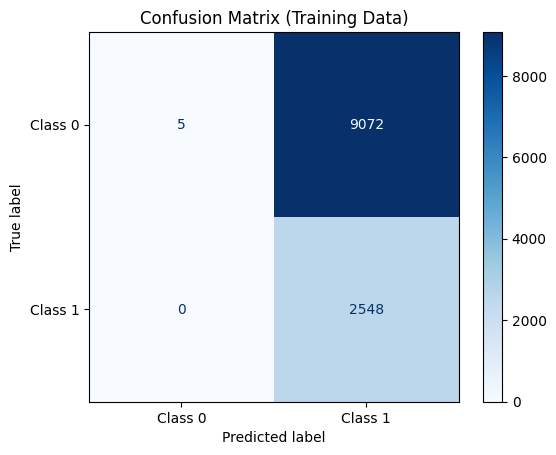


Confusion Matrix (Training Data):
[[   5 9072]
 [   0 2548]]

Generating confusion matrix for testing data...
X_test shape for VGG (for prediction): (1657, 23, 256)
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


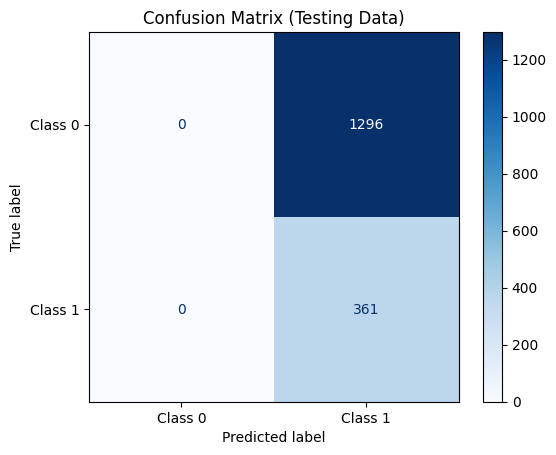


Confusion Matrix (Testing Data):
[[   0 1296]
 [   0  361]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Ensure the VGG model trained on augmented data (model_vgg_resampled)
# and the combined training data (combined_X_train, combined_y_train)
# and the test data (X_test, y_test) are available.

if 'model_vgg_resampled' in globals() and 'combined_X_train' in globals() and 'combined_y_train' in globals() and 'X_test' in globals() and 'y_test' in globals():
    print("Generating confusion matrix for training data...")

    # --- Confusion Matrix for Training Data ---
    # The VGG-like model expects input shape (samples, features, timesteps)
    # Our combined_X_train is currently in (samples, timesteps, features)
    # We need to transpose combined_X_train back to (samples, features, timesteps) for the VGG model prediction input.
    if combined_X_train.shape[1] == 256 and combined_X_train.shape[2] == 23:
        X_train_vgg_for_prediction = np.transpose(combined_X_train, (0, 2, 1))
        print(f"Transposed combined_X_train shape for VGG (for prediction): {X_train_vgg_for_prediction.shape}")
    else:
        # If combined_X_train is already in the desired shape, use it directly
        X_train_vgg_for_prediction = combined_X_train
        print(f"combined_X_train shape for VGG (for prediction, no transpose needed): {X_train_vgg_for_prediction.shape}")

    # Get the model's predictions on the training data
    y_pred_probs_train = model_vgg_resampled.predict(X_train_vgg_for_prediction)

    # Convert predictions from probabilities to class labels
    y_pred_classes_train = np.argmax(y_pred_probs_train, axis=1)

    # Convert true labels from one-hot encoding to class labels
    y_true_classes_train = np.argmax(combined_y_train, axis=1)

    # Compute the confusion matrix for training data
    cm_train = confusion_matrix(y_true_classes_train, y_pred_classes_train)

    # Get the class labels (assuming binary classification based on combined_y_train shape)
    class_labels = [f'Class {i}' for i in range(combined_y_train.shape[1])]

    # Display the confusion matrix for training data
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_labels)
    disp_train.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix (Training Data)')
    plt.show()

    print("\nConfusion Matrix (Training Data):")
    print(cm_train)

    print("\nGenerating confusion matrix for testing data...")

    # --- Confusion Matrix for Testing Data ---
    # X_test is assumed to be in the original (samples, features, timesteps) format
    # Verify X_test shape
    if X_test.shape[1] == 23 and X_test.shape[2] == 256:
         X_test_vgg_for_prediction = X_test
         print(f"X_test shape for VGG (for prediction): {X_test_vgg_for_prediction.shape}")
    elif X_test.shape[1] == 256 and X_test.shape[2] == 23:
         # If X_test was transposed elsewhere, transpose it back for VGG
         X_test_vgg_for_prediction = np.transpose(X_test, (0, 2, 1))
         print(f"Transposed X_test shape for VGG (for prediction): {X_test_vgg_for_prediction.shape}")
    else:
         X_test_vgg_for_prediction = X_test
         print(f"X_test shape for VGG (for prediction, no transpose needed): {X_test_vgg_for_prediction.shape}")


    # Get the model's predictions on the test data
    y_pred_probs_test = model_vgg_resampled.predict(X_test_vgg_for_prediction)

    # Convert predictions from probabilities to class labels
    y_pred_classes_test = np.argmax(y_pred_probs_test, axis=1)

    # Convert true labels from one-hot encoding to class labels
    y_true_classes_test = np.argmax(y_test, axis=1)

    # Compute the confusion matrix for test data
    cm_test = confusion_matrix(y_true_classes_test, y_pred_classes_test)

    # Get the class labels (assuming binary classification based on y_test shape)
    class_labels_test = [f'Class {i}' for i in range(y_test.shape[1])]

    # Display the confusion matrix for test data
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_labels_test)
    disp_test.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix (Testing Data)')
    plt.show()

    print("\nConfusion Matrix (Testing Data):")
    print(cm_test)


else:
    print("Please ensure the trained model (model_vgg_resampled), combined training data, and test data are available.")
    print("Make sure you have successfully run the cells for data loading, splitting, GAN implementation, data combining, and VGG model training on augmented data.")

## Addressing Class Imbalance: Oversampling

In [ ]:
from sklearn.utils import resample
import numpy as np

# Ensure combined_X_train and combined_y_train are available from previous steps
# (Combining Real and Synthetic Data)

if 'combined_X_train' in globals() and 'combined_y_train' in globals():
    print("Applying oversampling to the combined training data...")

    # Assuming binary classification (Class 0 and Class 1)
    # Identify the majority and minority class samples
    # combined_y_train is one-hot encoded, so we need to convert to class labels first
    y_train_classes = np.argmax(combined_y_train, axis=1)

    # Separate majority and minority class indices
    majority_class_index = 0 # Assuming Class 0 is the majority class based on previous confusion matrices
    minority_class_index = 1 # Assuming Class 1 is the minority class

    # Get indices for majority and minority class samples
    majority_indices = np.where(y_train_classes == majority_class_index)[0]
    minority_indices = np.where(y_train_classes == minority_class_index)[0]

    # Get the actual samples for majority and minority classes
    majority_class_X = combined_X_train[majority_indices]
    majority_class_y = combined_y_train[majority_indices]
    minority_class_X = combined_X_train[minority_indices]
    minority_class_y = combined_y_train[minority_indices]

    print(f"Original majority class samples: {len(majority_indices)}")
    print(f"Original minority class samples: {len(minority_indices)}")

    # Oversample the minority class to match the number of majority class samples
    # We use replacement=True to allow for duplicating instances
    minority_class_X_oversampled, minority_class_y_oversampled = resample(minority_class_X, minority_class_y,
                                                                          replace=True,     # Sample with replacement
                                                                          n_samples=len(majority_indices), # To match majority class size
                                                                          random_state=42)  # For reproducibility

    print(f"Oversampled minority class samples: {len(minority_class_X_oversampled)}")

    # Combine the majority class samples with the oversampled minority class samples
    X_train_resampled = np.concatenate((majority_class_X, minority_class_X_oversampled), axis=0)
    y_train_resampled = np.concatenate((majority_class_y, minority_class_y_oversampled), axis=0)

    print("Shape of resampled training data (X_train_resampled):", X_train_resampled.shape)
    print("Shape of resampled training labels (y_train_resampled):", y_train_resampled.shape)

    # Shuffle the resampled data to mix the classes
    shuffle_indices = np.random.permutation(len(X_train_resampled))
    X_train_resampled = X_train_resampled[shuffle_indices]
    y_train_resampled = y_train_resampled[shuffle_indices]

    print("Resampled training data has been shuffled.")

    # Now use X_train_resampled and y_train_resampled to train the VGG model.

else:
    print("Please ensure combined_X_train and combined_y_train are available by running previous cells.")

Applying oversampling to the combined training data...
Original majority class samples: 9077
Original minority class samples: 2548
Oversampled minority class samples: 9077
Shape of resampled training data (X_train_resampled): (18154, 256, 23)
Shape of resampled training labels (y_train_resampled): (18154, 2)
Resampled training data has been shuffled.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Ensure X_test, y_test, and model_vgg_resampled are available

if 'model_vgg_resampled' in globals() and 'X_test' in globals() and 'y_test' in globals():
    print("\n--- Model Performance Metrics ---")

    # Get predictions on the test data
    y_pred_probs = model_vgg_resampled.predict(X_test)

    # Convert predictions from probabilities to class labels
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    # Convert true labels from one-hot encoding to class labels
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate Precision, Recall, and F1-Score
    # Use 'weighted' average to account for class imbalance if present in test set
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

else:
    print("Please ensure the trained model (model_vgg_resampled), and test data (X_test, y_test) are available.")


--- Model Performance Metrics ---
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Precision: 0.0475
Recall: 0.2179
F1 Score: 0.0779


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


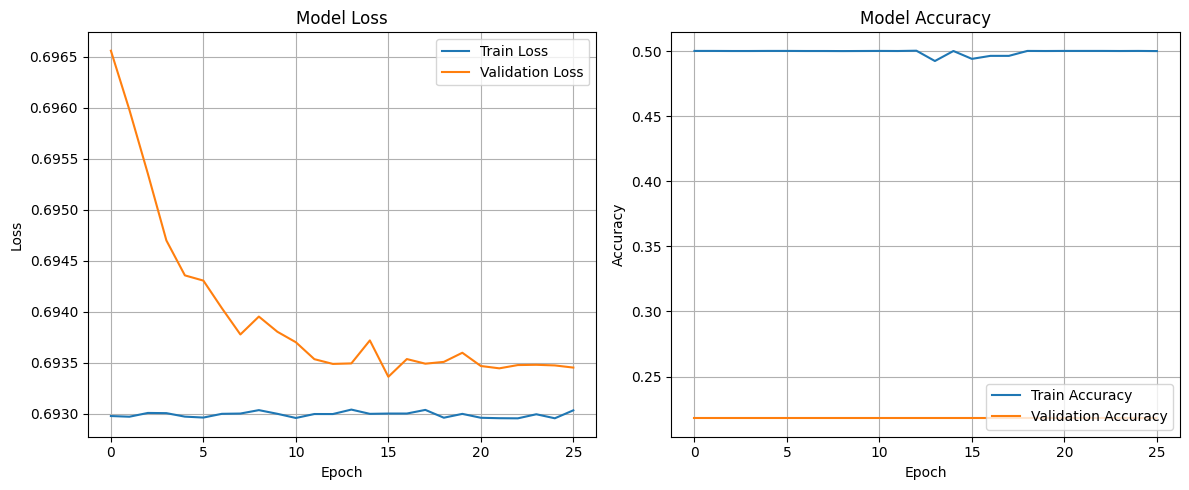

In [ ]:
import matplotlib.pyplot as plt

# Visualize training history

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(history_vgg_resampled_finetune.history['loss'], label='Train Loss')
plt.plot(history_vgg_resampled_finetune.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

# Plot training & validation accuracy values
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history_vgg_resampled_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg_resampled_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()